In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [107]:
df = pd.read_csv("\data_science\mushrooms.csv")

In [108]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [109]:
df['edible']=df['class'].map({'p' : 0, 'e' : 1})

In [110]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,edible
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,0
1,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,1
2,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,1
3,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,0
4,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,1


In [111]:
df.isnull().mean()

class                       0.0
cap-shape                   0.0
cap-surface                 0.0
cap-color                   0.0
bruises                     0.0
odor                        0.0
gill-attachment             0.0
gill-spacing                0.0
gill-size                   0.0
gill-color                  0.0
stalk-shape                 0.0
stalk-root                  0.0
stalk-surface-above-ring    0.0
stalk-surface-below-ring    0.0
stalk-color-above-ring      0.0
stalk-color-below-ring      0.0
veil-type                   0.0
veil-color                  0.0
ring-number                 0.0
ring-type                   0.0
spore-print-color           0.0
population                  0.0
habitat                     0.0
edible                      0.0
dtype: float64

In [112]:
df.drop(['class'], axis=1, inplace=True)
df.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'edible'],
      dtype='object')

In [113]:
df2 = pd.get_dummies(data=df, dtype=int, drop_first=True)
df2.head()

,edible,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [114]:
df2.dtypes

edible         int64
cap-shape_c    int32
cap-shape_f    int32
cap-shape_k    int32
cap-shape_s    int32
               ...  
habitat_l      int32
habitat_m      int32
habitat_p      int32
habitat_u      int32
habitat_w      int32
Length: 96, dtype: object

In [115]:
X = df2.drop(['edible'], axis=1)
y = df2['edible']

In [116]:
X.columns

Index(['cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l', 'odor_m',
       'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_f',
       'gill-spacing_w', 'gill-size_n', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'stalk-shape_t', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_c',
       'stalk-color-above-rin

In [117]:
class modeler():
    
    def __init__(self, X, y):
        #Out initialization takes in our X features and Y target
        self.params = None
        self.model_type = None
        self.X = X
        self.y = y
        # Test train split on the data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, stratify = self.y)
        
        # Scale the data
        sc = StandardScaler()
        self.Z_train = sc.fit_transform(self.X_train)
        self.Z_test = sc.transform(self.X_test)
        self.Z = sc.fit_transform(self.X)
        
    def analyzer(self, model_type, params):
        # Takes a model type with it's associated parameters
        self.params = params
        self.model_type = model_type

        print(f'Method being used: {self.model_type}')
        
        model = self.model_type
        model.fit(self.X_train, self.y_train)

        # metrics with no grid search, scaled and unscalec
        print(f'Method Test with no scaling or Gridsearching: {np.round(model.score(self.X_test, self.y_test), 3)}')

        model.fit(self.Z_train, self.y_train)
        print(f'Method Test with scaling but no Gridsearching: {np.round(model.score(self.Z_test, self.y_test), 3)}')
        print(' ')

        # Instantiate our GridSearchCV object.
        model_gridsearch = GridSearchCV(model, # What is the model we want to fit?
                                      param_grid = self.params, # What is the dictionary of hyperparameters?
                                      cv=5) 
        
        # Fit our model and print metrics
        model_gridsearch.fit(self.X_train, self.y_train);
        print(f'Best Train score for Gridsearched w/out scaling {np.round(model_gridsearch.best_score_, 3)}')
        
        best = model_gridsearch.best_estimator_
        
        print(f'Best Test score for Gridsearched w/out scaling {np.round(best.score(self.X_test, self.y_test), 3)}')
        print(' ')
        

        model_gridsearch.fit(self.Z_train, self.y_train);
        print(f'Best Train score for Gridsearched w/ scaling {np.round(model_gridsearch.best_score_, 3)}')
        
        best = model_gridsearch.best_estimator_
        
        print(f'Best Test score for Gridsearched w/ scaling {np.round(best.score(self.Z_test, self.y_test), 3)}')        
        
        return best

In [118]:
model = modeler(X, y)

In [119]:
params = {
    'C' : [.00001, .0001, .001, .01, 1],
    'solver' : ['liblinear']
    }
best_model = model.analyzer(LogisticRegression(), params)

Method being used: LogisticRegression()
Method Test with no scaling or Gridsearching: 0.998
Method Test with scaling but no Gridsearching: 1.0
 
Best Train score for Gridsearched w/out scaling 0.999
Best Test score for Gridsearched w/out scaling 0.998
 
Best Train score for Gridsearched w/ scaling 1.0
Best Test score for Gridsearched w/ scaling 1.0


In [120]:
best_model.coef_

array([[-1.14360724e-01, -7.94278107e-02, -3.74811089e-02,
         1.62060309e-01,  3.86579398e-04, -1.03706410e-01,
        -3.92490216e-01, -2.12536651e-01,  2.46392164e-01,
         3.07238283e-02,  6.91803365e-02,  2.46728306e-01,
        -1.01712840e-01,  8.76972108e-02,  7.46853888e-02,
        -1.21040371e-01,  1.47343761e-01,  2.24711553e-01,
        -1.47899356e+00, -1.37295436e+00,  3.93454724e-01,
        -8.99682314e-02,  1.62492258e+00, -1.46043892e+00,
        -6.31463510e-01, -6.32329551e-01, -1.90850323e-01,
         1.10085435e+00, -1.04530063e+00,  2.03755915e-01,
         1.23624056e-01, -7.08027814e-02,  2.04277110e-01,
         3.56688486e-01,  1.01686184e-01,  2.31944154e-01,
        -1.01591080e-01,  1.86664605e-01,  2.00606308e-01,
         9.60406022e-02,  5.62526716e-04, -6.40991823e-02,
         7.56555326e-01,  2.21750272e-01,  8.62258596e-01,
        -7.01983318e-01,  2.51479528e-01,  1.29744937e-01,
        -3.46510800e-01,  1.51641930e-01, -5.88035980e-0

In [123]:
# Exponentiate our coef's and print them with their associated features
odds = list(np.exp(best_model.coef_))
odds = odds[0]
print('Exponentiate our coefs:')
print('')
for i in range(len(X.columns)):
#    if odds[i] > 2:
        print(X.columns[i])
        print(np.round(odds[i], 3))
        print(' ')

Exponentiate our coefs:

cap-shape_c
0.892
 
cap-shape_f
0.924
 
cap-shape_k
0.963
 
cap-shape_s
1.176
 
cap-shape_x
1.0
 
cap-surface_g
0.901
 
cap-surface_s
0.675
 
cap-surface_y
0.809
 
cap-color_c
1.279
 
cap-color_e
1.031
 
cap-color_g
1.072
 
cap-color_n
1.28
 
cap-color_p
0.903
 
cap-color_r
1.092
 
cap-color_u
1.078
 
cap-color_w
0.886
 
cap-color_y
1.159
 
bruises_t
1.252
 
odor_c
0.228
 
odor_f
0.253
 
odor_l
1.482
 
odor_m
0.914
 
odor_n
5.078
 
odor_p
0.232
 
odor_s
0.532
 
odor_y
0.531
 
gill-attachment_f
0.826
 
gill-spacing_w
3.007
 
gill-size_n
0.352
 
gill-color_e
1.226
 
gill-color_g
1.132
 
gill-color_h
0.932
 
gill-color_k
1.227
 
gill-color_n
1.429
 
gill-color_o
1.107
 
gill-color_p
1.261
 
gill-color_r
0.903
 
gill-color_u
1.205
 
gill-color_w
1.222
 
gill-color_y
1.101
 
stalk-shape_t
1.001
 
stalk-root_b
0.938
 
stalk-root_c
2.131
 
stalk-root_e
1.248
 
stalk-root_r
2.369
 
stalk-surface-above-ring_k
0.496
 
stalk-surface-above-ring_s
1.286
 
stalk-surface-abov

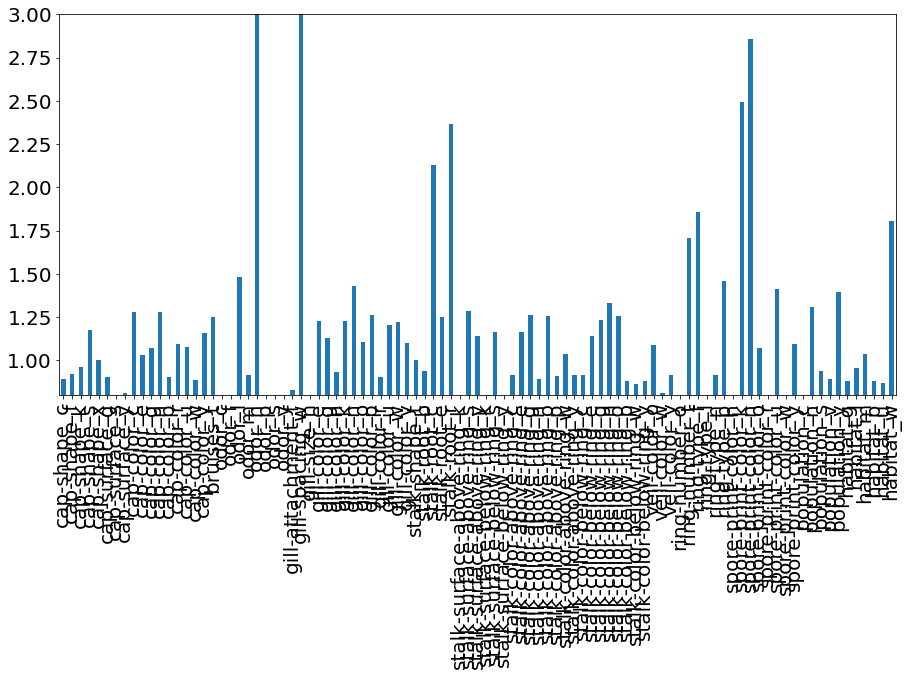

In [124]:
# Plot our odds and look at what features have the largest odds
pd.Series(odds, index=X.columns).plot.bar(figsize=(15, 7))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(ymin=0.8, ymax=3);